<h1 style='text-align:center;'>EDA</h1>

<hr>

import libraries

In [63]:
# import libraries
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

<hr>

We created 'preprocess' function in previous step<br>
And we prepare our dataset here for EDA 

In [64]:
#data_preprocessing

def preprocess(dataset:pd.DataFrame) -> pd.DataFrame :
    '''
    dataset contain this columns:
        'gender':               ['Female' 'Male']
        'SeniorCitizen':        [0 1]
        'Partner':              ['Yes' 'No']
        'Dependents':           ['No' 'Yes']
        'tenure':               int
        'PhoneService':         ['No' 'Yes']
        'MultipleLines':        ['No phone service' 'No' 'Yes']
        'InternetService':      ['DSL' 'Fiber optic' 'No']
        'OnlineSecurity':       ['No' 'Yes' 'No internet service']
        'OnlineBackup':         ['Yes' 'No' 'No internet service']
        'DeviceProtection':     ['No' 'Yes' 'No internet service']
        'TechSupport':          ['No' 'Yes' 'No internet service']
        'StreamingTV':          ['No' 'Yes' 'No internet service']
        'StreamingMovies':      ['No' 'Yes' 'No internet service']
        'Contract':             ['Month-to-month' 'One year' 'Two year']
        'PaperlessBilling':     ['Yes' 'No']
        'PaymentMethod':        ['Electronic check' 'Mailed check' 'Bank transfer (automatic)' 'Credit card (automatic)']
        'MonthlyCharges':       float
        'TotalCharges':         float
        'Churn':                ['No' 'Yes']   // Not necessary
    '''
    df = dataset.copy()

    # Prepare string variables
    df.columns = df.columns.str.lower().str.replace(' ','_')
    string_columns = list(df.dtypes[df.dtypes=='O'].index)
    for col in string_columns:
        df[col] = df[col].str.lower().str.replace(' ','_')

    # drop customerid
    if 'customerid' in df.columns:
        del df['customerid']
        
    # Prepare numeric columns type
    if 'tenure' in df.columns:
        df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
        df['tenure'] = df['tenure'].fillna(0)
    else:
        raise Exception("!!! Tenure column didn't exist !!!")

    if 'monthlycharges' in df.columns:
        df['monthlycharges'] = pd.to_numeric(df['monthlycharges'], errors='coerce')
        df['monthlycharges'] = df['monthlycharges'].fillna(0)
    else:
        raise Exception("!!! MonthlyCharges column didn't exist !!!")

    if 'totalcharges' in df.columns:
        df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
        df['totalcharges'] = df['totalcharges'].fillna(0)
    else:
        raise Exception("!!! TotalCharges column didn't exist !!!")
        
    # Make dependent variable numeric
    if 'churn' in df.columns:
        df.churn = (df.churn == 'yes').astype(int)
    
    return df

In [65]:
df = pd.read_csv('Churn_prediction.csv')
df = preprocess(df)

<hr>

Understanding the Churn Distribution
- Let's known our target feature

In [66]:
df['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [67]:
round(df['churn'].mean()*100, 2)

26.54

26.54% of our data is about the Churned customers 

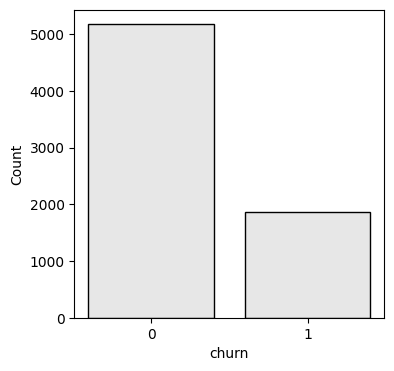

In [68]:
plt.figure(figsize=(4,4))
plt.bar(df['churn'].value_counts().index, df['churn'].value_counts().values, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='black')
plt.xticks([0,1],df['churn'].value_counts().index )
plt.ylabel('Count', fontsize=10)
plt.xlabel('churn', fontsize=10)
plt.show()

<hr>

<h2>Categorical data</h2>

In [69]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']

Which group of observation has more risk of churn?

In [70]:
global_mean = df['churn'].mean()
x=df.groupby(by='gender').churn.agg(['count','mean'])
x['diff'] = x['mean'] - global_mean
x['risk'] = x['mean'] / global_mean

In [71]:
x['count'].index

Index(['female', 'male'], dtype='object', name='gender')

---------------------------------------------------------------
gender


,mean,diff,risk
gender,,,
female,0.269209,0.003839,1.014466
male,0.261603,-0.003766,0.985807


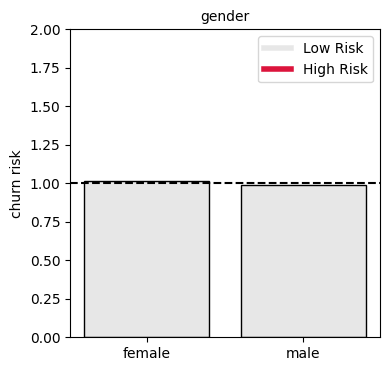

---------------------------------------------------------------
seniorcitizen


,mean,diff,risk
seniorcitizen,,,
1,0.416813,0.151443,1.570686
0,0.236062,-0.029308,0.889557


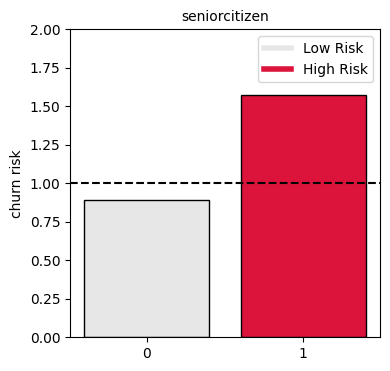

---------------------------------------------------------------
partner


,mean,diff,risk
partner,,,
no,0.329580,0.064210,1.241964
yes,0.196649,-0.068721,0.741038


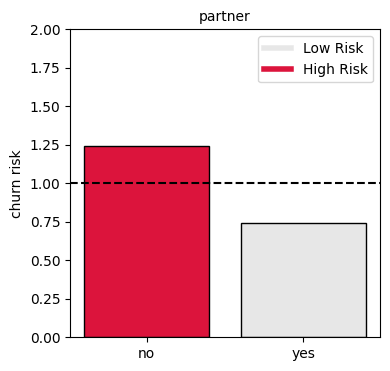

---------------------------------------------------------------
dependents


,mean,diff,risk
dependents,,,
no,0.312791,0.047422,1.178700
yes,0.154502,-0.110868,0.582215


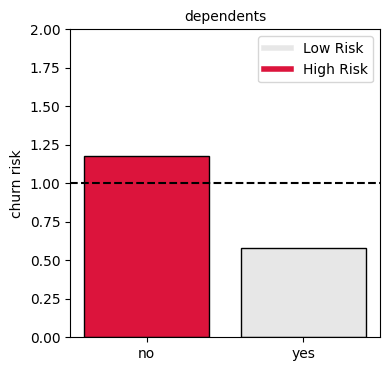

---------------------------------------------------------------
phoneservice


,mean,diff,risk
phoneservice,,,
yes,0.267096,0.001726,1.006506
no,0.249267,-0.016103,0.939319


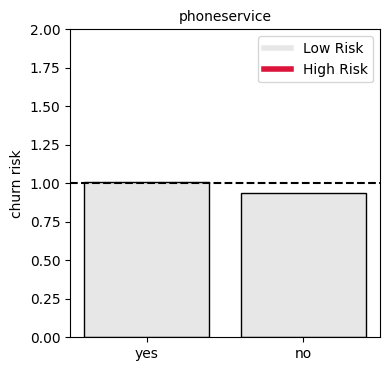

---------------------------------------------------------------
multiplelines


,mean,diff,risk
multiplelines,,,
yes,0.286099,0.020729,1.078114
no,0.250442,-0.014927,0.943749
no_phone_service,0.249267,-0.016103,0.939319


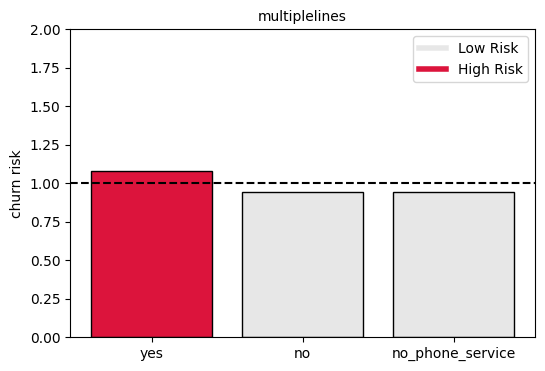

---------------------------------------------------------------
internetservice


,mean,diff,risk
internetservice,,,
fiber_optic,0.418928,0.153558,1.578656
dsl,0.189591,-0.075779,0.714441
no,0.074050,-0.191320,0.279044


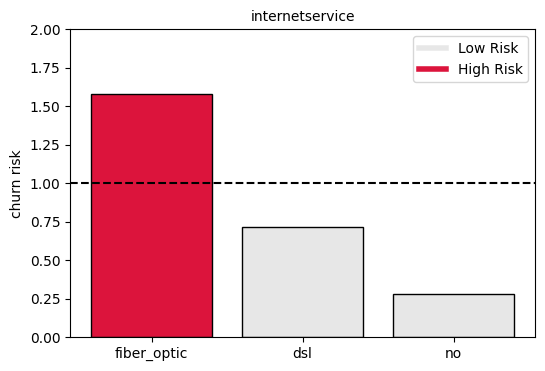

---------------------------------------------------------------
onlinesecurity


,mean,diff,risk
onlinesecurity,,,
no,0.417667,0.152297,1.573906
yes,0.146112,-0.119258,0.550597
no_internet_service,0.074050,-0.191320,0.279044


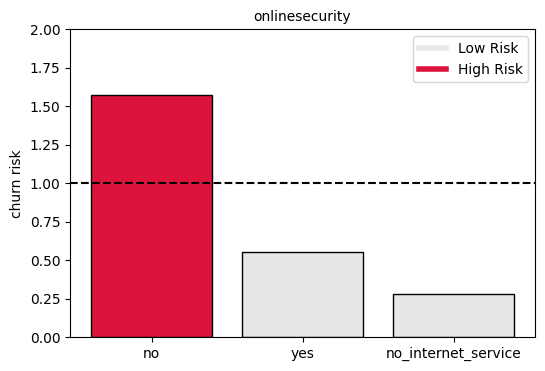

---------------------------------------------------------------
onlinebackup


,mean,diff,risk
onlinebackup,,,
no,0.399288,0.133918,1.504645
yes,0.215315,-0.050055,0.811377
no_internet_service,0.074050,-0.191320,0.279044


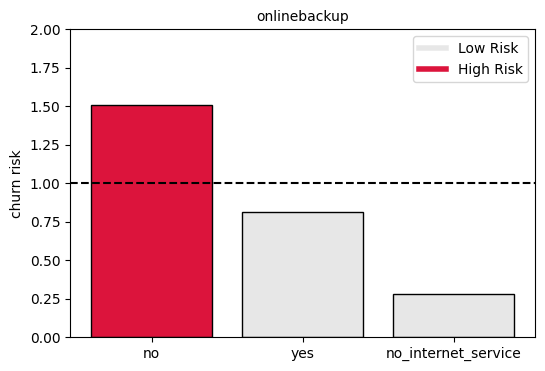

---------------------------------------------------------------
deviceprotection


,mean,diff,risk
deviceprotection,,,
no,0.391276,0.125906,1.474456
yes,0.225021,-0.040349,0.847951
no_internet_service,0.074050,-0.191320,0.279044


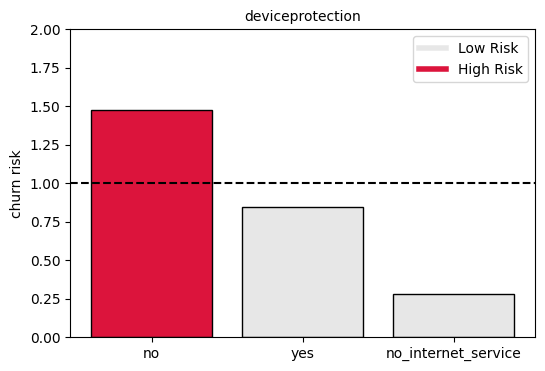

---------------------------------------------------------------
techsupport


,mean,diff,risk
techsupport,,,
no,0.416355,0.150985,1.568960
yes,0.151663,-0.113706,0.571517
no_internet_service,0.074050,-0.191320,0.279044


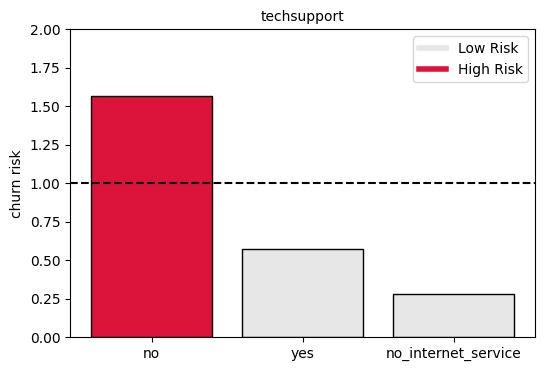

---------------------------------------------------------------
streamingtv


,mean,diff,risk
streamingtv,,,
no,0.335231,0.069861,1.263261
yes,0.300702,0.035332,1.133143
no_internet_service,0.074050,-0.191320,0.279044


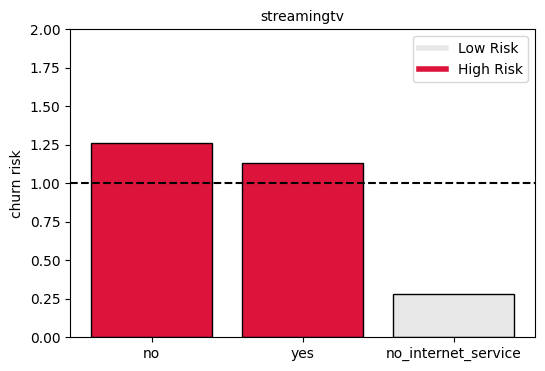

---------------------------------------------------------------
streamingmovies


,mean,diff,risk
streamingmovies,,,
no,0.336804,0.071434,1.269188
yes,0.299414,0.034044,1.128291
no_internet_service,0.074050,-0.191320,0.279044


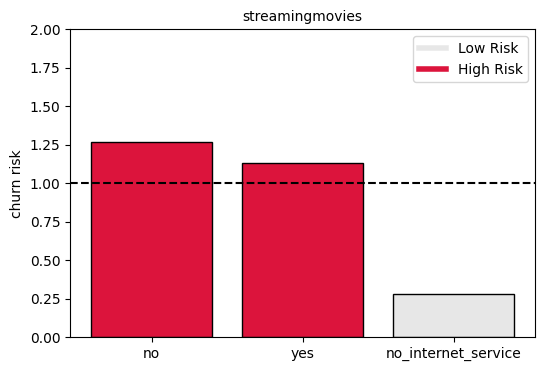

---------------------------------------------------------------
contract


,mean,diff,risk
contract,,,
month-to-month,0.427097,0.161727,1.609440
one_year,0.112695,-0.152675,0.424672
two_year,0.028319,-0.237051,0.106714


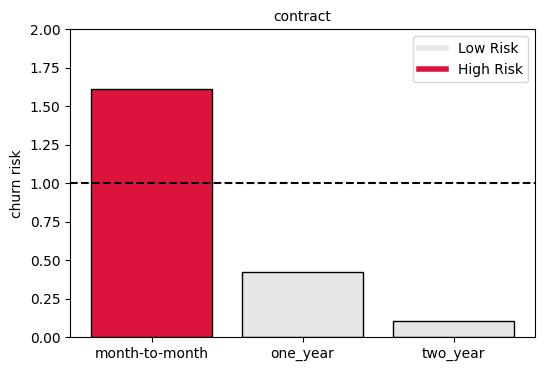

---------------------------------------------------------------
paperlessbilling


,mean,diff,risk
paperlessbilling,,,
yes,0.335651,0.070281,1.264842
no,0.163301,-0.102069,0.615371


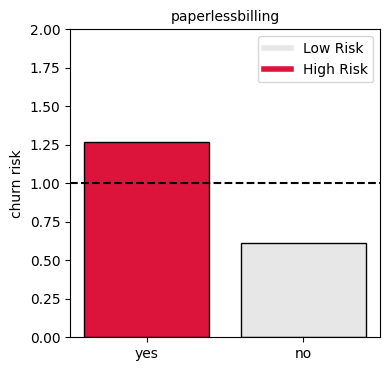

---------------------------------------------------------------
paymentmethod


,mean,diff,risk
paymentmethod,,,
electronic_check,0.452854,0.187484,1.706502
mailed_check,0.191067,-0.074303,0.720003
bank_transfer_(automatic),0.167098,-0.098271,0.629681
credit_card_(automatic),0.152431,-0.112939,0.574410


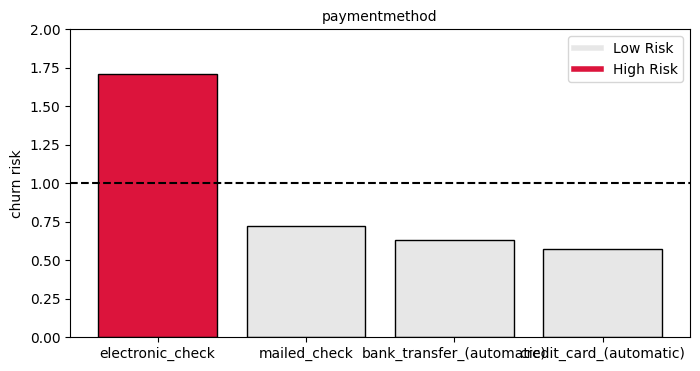

In [72]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=(0.1, 0.1, 0.1, 0.1), lw=4),
                Line2D([0], [0], color='crimson', lw=4)]



global_mean = df['churn'].mean()

round(global_mean, 3)

for col in categorical:
    print('---------------------------------------------------------------')
    print(col)
    
    df_group = df.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    df_group['color'] = [(0.1, 0.1, 0.1, 0.1) if x <= 1.05 else 'crimson' for x in df_group['risk']] 
    df_group.sort_values(by='risk', ascending=False, inplace=True)
    display(df_group.loc[:,df_group.columns!='color'])
    
    # Plot
    plt.figure(figsize=(len(df_group)*2,4))
    plt.bar(df_group.index, df_group['risk'].values, color= df_group['color'],  edgecolor='black')
    plt.xticks(df_group.index, df_group.index )
    plt.title(col, fontsize=10)
    plt.ylabel('churn risk', fontsize=10)
    plt.legend(custom_lines, ['Low Risk', 'High Risk'], loc='best')
    plt.axhline(y=1, color='black', linestyle='--')
    plt.ylim([0, 2])
    plt.show()

-   Fortunately, the company's policies have been such that there is no dissatisfaction between men and women.
-   senior citizens have a high risk of churning.
-   The company should pay more attention to people who haven't partners( Singles like me :) ).
-   Customers who subscribe to Internet Fiber Optic are in the churn danger zone.
-   Churn probability of customers with month-to-month contract types is more. 

<hr>

<h2>Mutual information</h2>
Mutual information (MI) - concept from information theory , it tells us how much we can learn about one variable if we know the value of another<br>
<a href='https://en.wikipedia.org/wiki/Mutual_information'>https://en.wikipedia.org/wiki/Mutual_information</a><br>
We find out contract, onlinesecurity, techsupport and internetservice are important independent variables

In [73]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df['churn'])

df_mi = df[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='more_important')

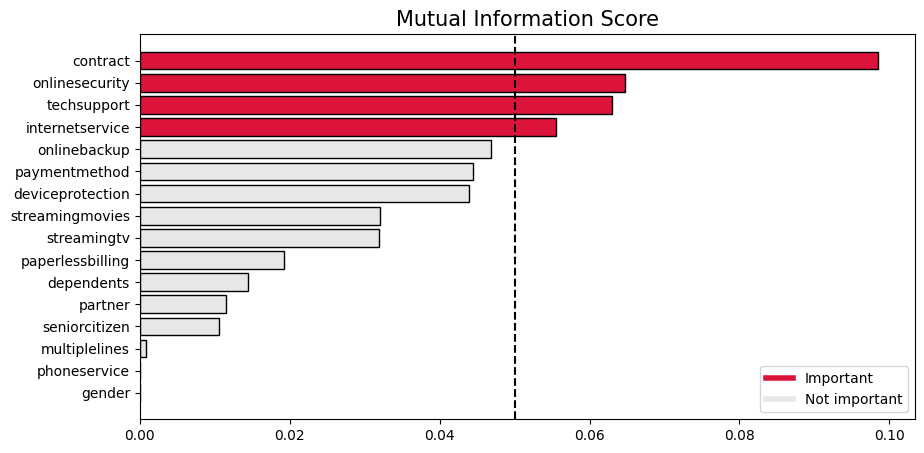

In [74]:
custom_lines = [Line2D([0], [0], color='crimson', lw=4),
                Line2D([0], [0], color=(0.1, 0.1, 0.1, 0.1), lw=4)]

df_mi = df_mi.sort_values(by='more_important', ascending=True)
df_mi['color'] = [(0.1,0.1,0.1,0.1) if x<0.05 else 'crimson' for x in df_mi['more_important']]
# plot
plt.figure(figsize=(10,5))
plt.barh(df_mi.index, df_mi['more_important'].values, color=df_mi['color'],  edgecolor='black')
plt.yticks()
plt.title('Mutual Information Score', fontsize=15)
plt.axvline(x=0.05, color='black', linestyle='--')
plt.legend(custom_lines, ['Important','Not important'], loc='lower right')
plt.show()

After this Analysis, I consider using <i>contract</i>, <i>onlinesecurity</i>, <i>techsupport</i>, and <i>internetservice</i> columns to create an ML model. Other columns don't give us more information about churn.

In [75]:
categorical_important=['contract', 'onlinesecurity', 'techsupport', 'internetservice']

<hr>

<h2>Numerical data</h2>

In [76]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [109]:
# calculate pearson correlation berween 'churn' and 'tenure'
df[['tenure','churn']].corr(method='pearson').churn.tenure

-0.35222867011307885

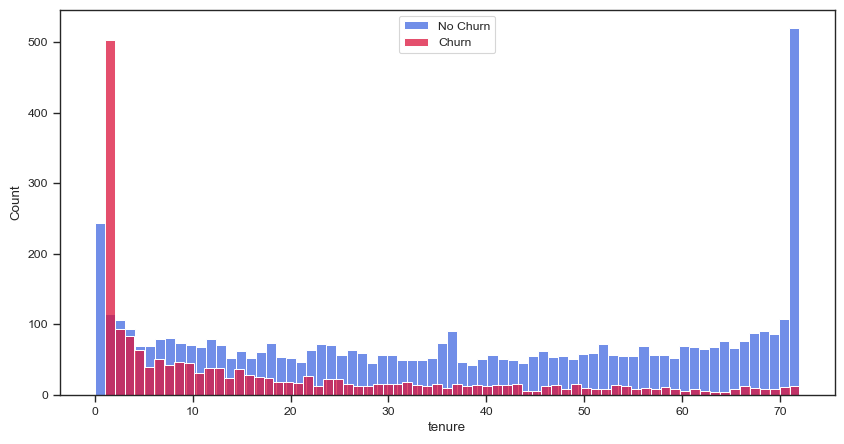

In [97]:
sns.set_style("ticks")
sns.set_context("paper")
plt.figure(figsize=(10,5))
sns.histplot(data=df[df.churn==0].tenure, color='royalblue', label="No Churn", bins=70)
sns.histplot(data=df[df.churn==1].tenure, color="crimson", label="Churn", bins=70)

plt.legend() 
plt.show()

In [110]:
# calculate pearson correlation berween 'churn' and 'monthlycharges'
df[['monthlycharges','churn']].corr(method='pearson').churn.monthlycharges

0.19335642223784716

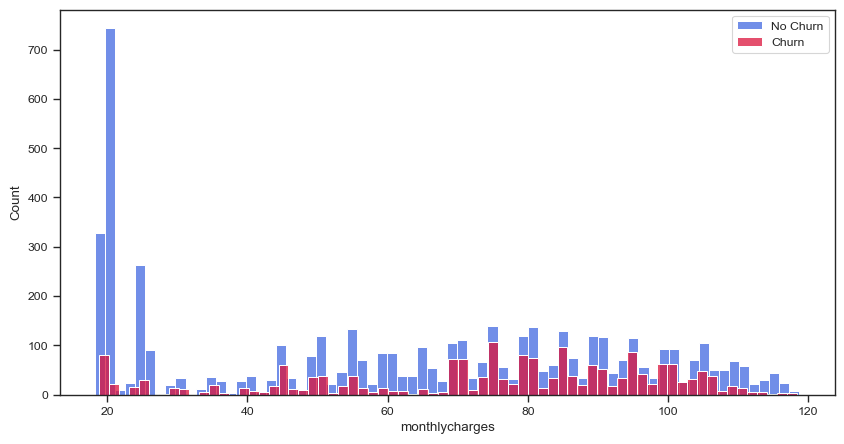

In [98]:
sns.set_style("ticks")
sns.set_context("paper")
plt.figure(figsize=(10,5))
sns.histplot(data=df[df.churn==0].monthlycharges, color='royalblue', label="No Churn", bins=70)
sns.histplot(data=df[df.churn==1].monthlycharges, color="crimson", label="Churn", bins=70)

plt.legend() 
plt.show()

In [111]:
# calculate pearson correlation berween 'churn' and 'totalcharges'
df[['totalcharges','churn']].corr(method='pearson').churn.totalcharges

-0.1983242626039948

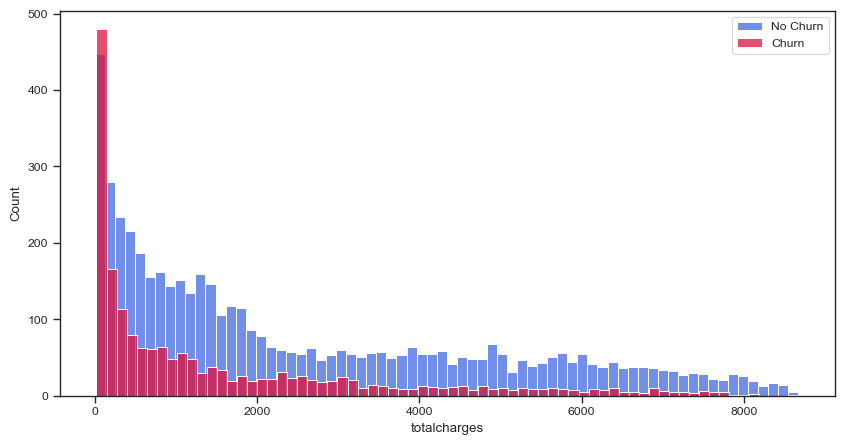

In [99]:
sns.set_style("ticks")
sns.set_context("paper")
plt.figure(figsize=(10,5))
sns.histplot(data=df[df.churn==0].totalcharges, color='royalblue', label="No Churn", bins=70)
sns.histplot(data=df[df.churn==1].totalcharges, color="crimson", label="Churn", bins=70)

plt.legend() 
plt.show()

-   There is no strong correlation between numerical columns and churn column.